In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [223]:
#importamos datasets
df = pd.read_csv('data/application_record.csv')
df_2 = pd.read_csv('data/credit_record.csv')

In [224]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [225]:
df.info()
#******* varios nulos en OCCUPATION_TYPE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [226]:
len(df.loc[:,'ID'].unique())

438510

In [227]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [228]:
len(df_2.loc[:,'ID'].unique())

45985

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1048575 non-null  int64  
 1   MONTHS_BALANCE       1048575 non-null  int64  
 2   STATUS               1048575 non-null  object 
 3   CODE_GENDER          777715 non-null   object 
 4   FLAG_OWN_CAR         777715 non-null   object 
 5   FLAG_OWN_REALTY      777715 non-null   object 
 6   CNT_CHILDREN         777715 non-null   float64
 7   AMT_INCOME_TOTAL     777715 non-null   float64
 8   NAME_INCOME_TYPE     777715 non-null   object 
 9   NAME_EDUCATION_TYPE  777715 non-null   object 
 10  NAME_FAMILY_STATUS   777715 non-null   object 
 11  NAME_HOUSING_TYPE    777715 non-null   object 
 12  DAYS_BIRTH           777715 non-null   float64
 13  DAYS_EMPLOYED        777715 non-null   float64
 14  FLAG_MOBIL           777715 non-null   float64
 15

In [230]:
df_application = df_2.pivot_table(index = 'ID', columns ='STATUS', values = 'MONTHS_BALANCE', aggfunc= 'count', fill_value = 0)
df_application = pd.DataFrame(df_application)
df_application.columns = df_application.columns.to_flat_index()
df_application = df_application.reset_index()
df_application = df_application.rename_axis(None, axis=1)
df_application.head()

,ID,0,1,2,3,4,5,C,X
0,5001711,3,0,0,0,0,0,0,1
1,5001712,10,0,0,0,0,0,9,0
2,5001713,0,0,0,0,0,0,0,22
3,5001714,0,0,0,0,0,0,0,15
4,5001715,0,0,0,0,0,0,0,60


In [231]:
df_application.info()
### esta tabla está agrupada por ID y tiene los conteos de los diferentes status de la vida del crédito
#estos nos srive para ver como ha sido el comportamiento dentro de los meses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      45985 non-null  int64
 1   0       45985 non-null  int64
 2   1       45985 non-null  int64
 3   2       45985 non-null  int64
 4   3       45985 non-null  int64
 5   4       45985 non-null  int64
 6   5       45985 non-null  int64
 7   C       45985 non-null  int64
 8   X       45985 non-null  int64
dtypes: int64(9)
memory usage: 3.2 MB


In [232]:
last_month=pd.DataFrame(df_2.groupby(['ID'])['MONTHS_BALANCE'].agg(max))
last_month=last_month.rename(columns={'MONTHS_BALANCE':'LAST_MONTH'}) 
last_month.reset_index(inplace = True)
last_month
# Esta tabla nos permite tener el último registro del ID, ya que puede no ser 0

,ID,LAST_MONTH
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,-11
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [233]:
count_month=pd.DataFrame(df_2.loc[df_2.STATUS!='X',:].groupby(['ID'])['MONTHS_BALANCE'].agg('count'))
count_month=count_month.rename(columns={'MONTHS_BALANCE':'COUNT_MONTHS'}) 
count_month.reset_index(inplace = True)
count_month
# Esta tabla nos permite sabes el número de meses que ha pagado, excluí la X ya que dentro de ese mes, como se especifica en el PDF de las instrucciones no hay prestamo si es X el status

,ID,COUNT_MONTHS
0,5001711,3
1,5001712,19
2,5001717,22
3,5001718,29
4,5001719,43
...,...,...
41444,5150480,26
41445,5150482,18
41446,5150484,13
41447,5150485,2


In [234]:
## hacemos un merge para tener el status del ultimo registro
last_month_status = last_month.merge(df_2, left_on = ['ID','LAST_MONTH'], right_on = ['ID', 'MONTHS_BALANCE'], how = 'left')
last_month_status = last_month_status.rename(columns={'STATUS':'LAST_STATUS',}) 
last_month_status

,ID,LAST_MONTH,MONTHS_BALANCE,LAST_STATUS
0,5001711,0,0,X
1,5001712,0,0,C
2,5001713,0,0,X
3,5001714,0,0,X
4,5001715,0,0,X
...,...,...,...,...
45980,5150482,-11,-11,C
45981,5150483,0,0,X
45982,5150484,0,0,C
45983,5150485,0,0,0


In [235]:
### hacemos un merge para tener el valor del último status
df_application = df_application.merge(last_month_status.loc[:,['ID', 'LAST_STATUS', 'LAST_MONTH']], left_on = 'ID', right_on = 'ID', how = 'left')
df_application = df_application.merge(count_month, left_on = 'ID', right_on = 'ID', how = 'left')
df_application

,ID,0,1,2,3,4,5,C,X,LAST_STATUS,LAST_MONTH,COUNT_MONTHS
0,5001711,3,0,0,0,0,0,0,1,X,0,3.0
1,5001712,10,0,0,0,0,0,9,0,C,0,19.0
2,5001713,0,0,0,0,0,0,0,22,X,0,NaN
3,5001714,0,0,0,0,0,0,0,15,X,0,NaN
4,5001715,0,0,0,0,0,0,0,60,X,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,12,0,0,0,0,0,6,0,C,-11,18.0
45981,5150483,0,0,0,0,0,0,0,18,X,0,NaN
45982,5150484,12,0,0,0,0,0,1,0,C,0,13.0
45983,5150485,2,0,0,0,0,0,0,0,0,0,2.0


In [236]:
df_application = df_application.dropna(subset=['COUNT_MONTHS'])
df_application
# dropeamos las filas que tengan Nan en count months ya que significa que todos los valores de ese ID siempre fueron X lo que indica que nunca tuvieron prestamo activo

,ID,0,1,2,3,4,5,C,X,LAST_STATUS,LAST_MONTH,COUNT_MONTHS
0,5001711,3,0,0,0,0,0,0,1,X,0,3.0
1,5001712,10,0,0,0,0,0,9,0,C,0,19.0
5,5001717,17,0,0,0,0,0,5,0,C,0,22.0
6,5001718,24,2,0,0,0,0,3,10,C,0,29.0
7,5001719,2,0,0,0,0,0,41,0,C,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45978,5150480,6,0,0,0,0,0,20,0,C,-24,26.0
45980,5150482,12,0,0,0,0,0,6,0,C,-11,18.0
45982,5150484,12,0,0,0,0,0,1,0,C,0,13.0
45983,5150485,2,0,0,0,0,0,0,0,0,0,2.0


In [238]:
df_application['LAST_STATUS'].value_counts()
# la mayor parte de los creditos están al corriente o con una mora de no más de 30 días

C    22707
0    10547
X     7730
1      353
5       82
2       19
3        6
4        5
Name: LAST_STATUS, dtype: int64

In [239]:
df_application.loc[df_application.LAST_STATUS=='C', ['0','1','2','3','4','5','X']].describe()
# Esto nos da informaciónde mucho valor, en promedio, las créditos que se encuentran en C han tenido en promedio 8 atrasos de menos de 30 días
# los  atrasos de más de 30 días no parecen ser tan recurrentes.

,0,1,2,3,4,5,X
count,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000
mean,8.046021,0.253975,0.024089,0.009116,0.006210,0.026556,1.482671
std,6.584479,0.983040,0.221879,0.121123,0.100234,0.550337,4.257159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,60.000000,22.000000,7.000000,8.000000,7.000000,30.000000,56.000000


In [240]:
df_application.loc[df_application.LAST_STATUS=='C', ['C', 'COUNT_MONTHS']]

,C,COUNT_MONTHS
1,9,19.0
5,5,22.0
6,3,29.0
7,41,43.0
10,22,22.0
...,...,...
45977,1,1.0
45978,20,26.0
45980,6,18.0
45982,1,13.0


In [241]:
df_2.loc[df_2.ID==5001729,: ]

,ID,MONTHS_BALANCE,STATUS
370,5001729,0,C
371,5001729,-1,0
372,5001729,-2,0
373,5001729,-3,0
374,5001729,-4,0
375,5001729,-5,0
376,5001729,-6,0


In [242]:
df_2.loc[df_2.ID==5079166,: ]

,ID,MONTHS_BALANCE,STATUS
615587,5079166,0,C
615588,5079166,-1,C
615589,5079166,-2,C
615590,5079166,-3,C
615591,5079166,-4,C
615592,5079166,-5,C
615593,5079166,-6,C
615594,5079166,-7,C
615595,5079166,-8,C
615596,5079166,-9,C


### 1. Definas y calcules KPIs de número de créditos “buenos” y “malos”, no olvides justificar tus KPI’s en cuanto importancia de uso

Explorando los datos se observa que, como se puede ver en los ejemplos, un mismo ID puede tener un last estatus C pero tener varias moras o inclusive algunos meses con deudas incobrables con el caso del ID 5079166. Por esto, vamos a clasificar 3 tipos de clientes:

1. Aquellos que tengan todos sus pagos en C, **COMO AA**
2. Aquellos que presenten más del 20%  de sus pagos(C) versus algun tipo de mora (0,1,2,3,4)  y que no tengan status de deuda incobrable (5) **COMO BB**
3. Aquellos que presenten menor o igual del 20% de sus pagos (C) versus algun tipo de mora (0,1,2,3,4) y que no tengan status de deuda incobrable (5) **COMO CC**
4. Aquellos que presenten menos del 50% de sus pagos en deuda incobrable (5) versus pagados (C) **COMO DD**
5. Aquellos que presenten más o igual del 50% de sus pagos en deuda incobrable (5) versus pagados (C) **COMO EE**






In [243]:
df_application['total_delay'] = df_application['0'] + df_application['1'] + df_application['2'] + df_application['3'] + df_application['4']
df_application.head(10)

,ID,0,1,2,3,4,5,C,X,LAST_STATUS,LAST_MONTH,COUNT_MONTHS,total_delay
0,5001711,3,0,0,0,0,0,0,1,X,0,3.0,3
1,5001712,10,0,0,0,0,0,9,0,C,0,19.0,10
5,5001717,17,0,0,0,0,0,5,0,C,0,22.0,17
6,5001718,24,2,0,0,0,0,3,10,C,0,29.0,26
7,5001719,2,0,0,0,0,0,41,0,C,0,43.0,2
8,5001720,29,7,0,0,0,0,0,0,1,0,36.0,36
9,5001723,8,0,0,0,0,0,0,23,X,0,8.0,8
10,5001724,0,0,0,0,0,0,22,9,C,0,22.0,0
11,5001725,7,0,0,0,0,0,0,1,0,0,7.0,7
12,5001726,6,0,0,0,0,0,33,0,C,0,39.0,6


In [244]:
df_application['C_RATING'] = np.where(df_application['COUNT_MONTHS']==df_application['C'], 'AA', 
                     np.where((df_application['5']==0) & (df_application['C']/df_application['COUNT_MONTHS']  > .2),'BB', 
                     np.where((df_application['5']==0) & (df_application['C']/df_application['COUNT_MONTHS']  <= .8),'CC',
                     np.where(df_application['5']/df_application['COUNT_MONTHS']<.5, 'DD', 
                     np.where(df_application['5']/df_application['COUNT_MONTHS']>=.5, 'EE','UNDEFINED')))))
df_application.head()

,ID,0,1,2,3,4,5,C,X,LAST_STATUS,LAST_MONTH,COUNT_MONTHS,total_delay,C_RATING
0,5001711,3,0,0,0,0,0,0,1,X,0,3.0,3,CC
1,5001712,10,0,0,0,0,0,9,0,C,0,19.0,10,BB
5,5001717,17,0,0,0,0,0,5,0,C,0,22.0,17,BB
6,5001718,24,2,0,0,0,0,3,10,C,0,29.0,26,CC
7,5001719,2,0,0,0,0,0,41,0,C,0,43.0,2,BB


In [245]:
df_application['C_RATING'].value_counts()
# asi queda la distribución de la clasificación de clientes, observamos que están cargados en clientes BB Y CC, o sea clientes que tienen pagos pero igual tienen retrasos

BB    19947
CC    19890
AA     1417
DD      152
EE       43
Name: C_RATING, dtype: int64

In [248]:
pd.DataFrame(100*(df_application['C_RATING'].value_counts()/df_application.shape[0]))
# En terminos generales es una cartera sana, ya que menos del .5% de los clientes tienen deudas incobrables
# aunque algo muy importante es que, tenemos una alta concentración en ratings CC, eso quiere decir que son clientes que tienen mas del 80% de sus pagos en mora

,C_RATING
BB,48.124201
CC,47.986682
AA,3.418659
DD,0.366716
EE,0.103742


In [247]:
## exportamos esta parte para la visualización de la tabla
df_application.to_csv('data/tabla_1.csv')

#### 2. Calcula el KPI por mes para los meses que sea posible calcularlos

Para esta parte ya no calculamos las métricas sobre el ID si no sobre el mes en cuestión, para esto generamos la siguiente clasificación:

1. Si el pago está en C: PAID
2. Si el pago está en (0,1): LOW_DELAY
3. SI el pago está en (2,3,4): HIGH_DELAY
4. SI el pago está en 5: OVERDUE 

--Descartamos las filas con STATUS X


In [249]:
df_2['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [250]:
df_application_month = df_2.loc[df_2.STATUS != 'X',:]
df_application_month['C_RATING_MONTH'] = np.where(df_application_month['STATUS']=='C', 'PAID',
                                         np.where(df_application_month['STATUS'].isin(['0','1']), 'LOW_DELAY',
                                         np.where(df_application_month['STATUS'].isin(['2','3','4']), 'HIGH_DELAY',
                                         np.where(df_application_month['STATUS']=='5', 'OVERDUE','UNDEFINED'))))
df_application_month['C_RATING_MONTH'].value_counts()

PAID          442031
LOW_DELAY     394210
OVERDUE         1693
HIGH_DELAY      1411
Name: C_RATING_MONTH, dtype: int64

In [255]:
df_application_month.head(10)

,ID,MONTHS_BALANCE,STATUS,C_RATING_MONTH
1,5001711,-1,0,LOW_DELAY
2,5001711,-2,0,LOW_DELAY
3,5001711,-3,0,LOW_DELAY
4,5001712,0,C,PAID
5,5001712,-1,C,PAID
6,5001712,-2,C,PAID
7,5001712,-3,C,PAID
8,5001712,-4,C,PAID
9,5001712,-5,C,PAID
10,5001712,-6,C,PAID


In [256]:
## exportamos esta parte para la visualización de la tabla
df_application_month.to_csv('data/tabla_2.csv')

In [257]:
kpi_month = df_application_month.pivot_table(index = 'MONTHS_BALANCE', columns ='C_RATING_MONTH', values = 'ID', aggfunc= 'count', fill_value = 0, margins = True).iloc[:-1,:]
kpi_month = pd.DataFrame(kpi_month)
kpi_month.columns = kpi_month.columns.to_flat_index()
kpi_month = kpi_month.reset_index()
kpi_month = kpi_month.rename_axis(None, axis=1)
kpi_month.head(60)

,MONTHS_BALANCE,HIGH_DELAY,LOW_DELAY,OVERDUE,PAID,All
0,-60,0,230,0,1,231
1,-59,0,541,0,9,550
2,-58,0,861,0,24,885
3,-57,0,1137,0,52,1189
4,-56,2,1444,0,91,1537
5,-55,3,1756,0,148,1907
6,-54,5,1993,0,230,2228
7,-53,7,2279,3,318,2607
8,-52,8,2562,3,435,3008
9,-51,13,2843,4,558,3418


In [258]:
for i in kpi_month.columns[1:-1]:
    kpi_month[i + '_%'] = np.round(100*(kpi_month[i]/ kpi_month['All']),3)
kpi_month.head(60)

,MONTHS_BALANCE,HIGH_DELAY,LOW_DELAY,OVERDUE,PAID,All,HIGH_DELAY_%,LOW_DELAY_%,OVERDUE_%,PAID_%
0,-60,0,230,0,1,231,0.000,99.567,0.000,0.433
1,-59,0,541,0,9,550,0.000,98.364,0.000,1.636
2,-58,0,861,0,24,885,0.000,97.288,0.000,2.712
3,-57,0,1137,0,52,1189,0.000,95.627,0.000,4.373
4,-56,2,1444,0,91,1537,0.130,93.949,0.000,5.921
5,-55,3,1756,0,148,1907,0.157,92.082,0.000,7.761
6,-54,5,1993,0,230,2228,0.224,89.452,0.000,10.323
7,-53,7,2279,3,318,2607,0.269,87.418,0.115,12.198
8,-52,8,2562,3,435,3008,0.266,85.173,0.100,14.461
9,-51,13,2843,4,558,3418,0.380,83.177,0.117,16.325


In [259]:
kpi_month.to_csv('data/tabla_3.csv')

--------------

### Análisis descriptivo

In [497]:
df_rating_all = df_application
df_rating_all['CLIENT_TYPE'] = np.where(df_rating_all.C_RATING == 'AA', 'GOOD', np.where(df_rating_all.C_RATING.isin(['DD','EE']), 'BAD', 'UNDEFINED'))
df_rating_all['CLIENT_TYPE'].value_counts()

UNDEFINED    39837
GOOD          1417
BAD            195
Name: CLIENT_TYPE, dtype: int64

In [498]:
df_rating_all = df_rating_all.merge(df, left_on = 'ID', right_on = 'ID', how = 'left')
df_rating_all.head()

,ID,0,1,2,3,4,5,C,X,LAST_STATUS,LAST_MONTH,COUNT_MONTHS,total_delay,C_RATING,CLIENT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5001711,3,0,0,0,0,0,0,1,X,0,3.0,3,CC,UNDEFINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001712,10,0,0,0,0,0,9,0,C,0,19.0,10,BB,UNDEFINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001717,17,0,0,0,0,0,5,0,C,0,22.0,17,BB,UNDEFINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001718,24,2,0,0,0,0,3,10,C,0,29.0,26,CC,UNDEFINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001719,2,0,0,0,0,0,41,0,C,0,43.0,2,BB,UNDEFINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [501]:
df_rating = df_rating_all.loc[df_rating_all.C_RATING.isin(['AA','DD','EE']), :]
df_rating

,ID,0,1,2,3,4,5,C,X,LAST_STATUS,LAST_MONTH,COUNT_MONTHS,total_delay,C_RATING,CLIENT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
7,5001724,0,0,0,0,0,0,22,9,C,0,22.0,0,AA,GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,5001789,0,0,0,0,0,0,22,11,C,0,22.0,0,AA,GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,5001892,0,0,0,0,0,0,51,4,C,0,51.0,0,AA,GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,5001912,0,0,0,0,0,0,6,0,C,0,6.0,0,AA,GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,5001913,0,0,0,0,0,0,10,1,C,0,10.0,0,AA,GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41426,5150422,0,0,0,0,0,0,25,1,C,0,25.0,0,AA,GOOD,F,N,Y,0.0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22116.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0
41439,5150475,0,0,0,0,0,0,36,8,C,0,36.0,0,AA,GOOD,M,Y,Y,0.0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886.0,-1315.0,1.0,1.0,0.0,0.0,Laborers,2.0
41442,5150478,0,0,0,0,0,0,6,8,C,0,6.0,0,AA,GOOD,M,Y,Y,0.0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886.0,-1315.0,1.0,1.0,0.0,0.0,Laborers,2.0
41443,5150479,0,0,0,0,0,0,1,8,C,0,1.0,0,AA,GOOD,F,N,N,0.0,90000.0,Working,Higher education,Married,With parents,-12414.0,-128.0,1.0,0.0,0.0,0.0,NaN,2.0


In [502]:

df_rating['CLIENT_TYPE'].value_counts()

GOOD    1417
BAD      195
Name: CLIENT_TYPE, dtype: int64

In [503]:
df_rating.shape

(1612, 32)

In [504]:
df_rating.isnull().sum()/df_rating.shape[0]
### Tenemos varios IDs sin información dentro del dataset de application_record

ID                     0.000000
0                      0.000000
1                      0.000000
2                      0.000000
3                      0.000000
4                      0.000000
5                      0.000000
C                      0.000000
X                      0.000000
LAST_STATUS            0.000000
LAST_MONTH             0.000000
COUNT_MONTHS           0.000000
total_delay            0.000000
C_RATING               0.000000
CLIENT_TYPE            0.000000
CODE_GENDER            0.200993
FLAG_OWN_CAR           0.200993
FLAG_OWN_REALTY        0.200993
CNT_CHILDREN           0.200993
AMT_INCOME_TOTAL       0.200993
NAME_INCOME_TYPE       0.200993
NAME_EDUCATION_TYPE    0.200993
NAME_FAMILY_STATUS     0.200993
NAME_HOUSING_TYPE      0.200993
DAYS_BIRTH             0.200993
DAYS_EMPLOYED          0.200993
FLAG_MOBIL             0.200993
FLAG_WORK_PHONE        0.200993
FLAG_PHONE             0.200993
FLAG_EMAIL             0.200993
OCCUPATION_TYPE        0.491315
CNT_FAM_

In [409]:
## En ocasiones, para no perder información es conveniente imputar datos faltantes, pero este caso no creo que sea lo idoneo, primero por que estamos desarrollando un análisis descriptivo, 
#y segundo y más importante, por lo que se observa, la información faltante es homogenea en todas las columnas, por lo que imputar supondría un grave error, avanzamos dropenado nulos

In [505]:
df_rating = df_rating.dropna(subset=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY', 'CNT_CHILDREN',
                                     'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 
                                     'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'])
df_rating

,ID,0,1,2,3,4,5,C,X,LAST_STATUS,LAST_MONTH,COUNT_MONTHS,total_delay,C_RATING,CLIENT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2860,5008827,2,8,2,1,1,5,19,0,C,0,38.0,14,DD,BAD,M,Y,Y,0.0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0
2914,5008893,0,0,0,0,0,0,37,0,C,0,37.0,0,AA,GOOD,F,N,Y,0.0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519.0,-3234.0,1.0,0.0,0.0,0.0,Laborers,1.0
2915,5008894,0,0,0,0,0,0,37,0,C,0,37.0,0,AA,GOOD,F,N,Y,0.0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519.0,-3234.0,1.0,0.0,0.0,0.0,Laborers,1.0
2916,5008895,0,0,0,0,0,0,35,0,C,0,35.0,0,AA,GOOD,F,N,Y,0.0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519.0,-3234.0,1.0,0.0,0.0,0.0,Laborers,1.0
2919,5008898,0,0,0,0,0,0,21,0,C,-11,21.0,0,AA,GOOD,F,N,Y,0.0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519.0,-3234.0,1.0,0.0,0.0,0.0,Laborers,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41426,5150422,0,0,0,0,0,0,25,1,C,0,25.0,0,AA,GOOD,F,N,Y,0.0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22116.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0
41439,5150475,0,0,0,0,0,0,36,8,C,0,36.0,0,AA,GOOD,M,Y,Y,0.0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886.0,-1315.0,1.0,1.0,0.0,0.0,Laborers,2.0
41442,5150478,0,0,0,0,0,0,6,8,C,0,6.0,0,AA,GOOD,M,Y,Y,0.0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886.0,-1315.0,1.0,1.0,0.0,0.0,Laborers,2.0
41443,5150479,0,0,0,0,0,0,1,8,C,0,1.0,0,AA,GOOD,F,N,N,0.0,90000.0,Working,Higher education,Married,With parents,-12414.0,-128.0,1.0,0.0,0.0,0.0,NaN,2.0


In [506]:
df_rating.isnull().sum()/df_rating.shape[0]
## no tocamos a la columna de ocupación

ID                     0.000000
0                      0.000000
1                      0.000000
2                      0.000000
3                      0.000000
4                      0.000000
5                      0.000000
C                      0.000000
X                      0.000000
LAST_STATUS            0.000000
LAST_MONTH             0.000000
COUNT_MONTHS           0.000000
total_delay            0.000000
C_RATING               0.000000
CLIENT_TYPE            0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.363354
CNT_FAM_

---------

#### Funciones

In [544]:
def pivot_table_level1(data, index, columns = 'CLIENT_TYPE', aggfunc = 'count'):
    data = data.pivot_table(index = index, columns = columns, values = 'ID', aggfunc = aggfunc)
    data = pd.DataFrame(data)
    data.columns = data.columns.to_flat_index()
    data = data.reset_index()
    data = data.rename_axis(None, axis=1)
    return data
    

In [508]:
df_prueba = pivot_table_level1(df_rating,'CODE_GENDER')
df_prueba

,CODE_GENDER,BAD,GOOD
0,F,111,750
1,M,69,358


In [509]:
def bar_plot_stack(data, x, y1, y2, width = 0.35, set_label = 'Número de clientes'):
    fig,ax = plt.subplots(figsize=(10, 7))
    ax.bar(data[x], data[y1], width = width, label = y1, color = 'blue')
    ax.bar(data[x], data[y2], bottom = data[y1], label = y2, width = width , color = 'skyblue')
    ax.set_ylabel(set_label)
    ax.legend()

    return plt.show()

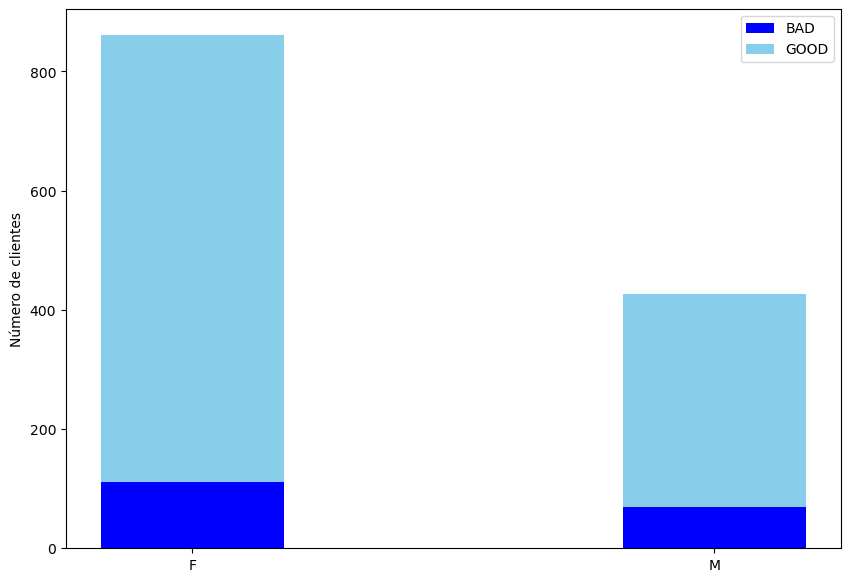

In [510]:
bar_plot_stack(pivot_table_level1(df_rating,'CODE_GENDER'), 'CODE_GENDER', 'BAD', 'GOOD', width = 0.35, set_label = 'Número de clientes')

-------------------

#### Gender 

In [511]:
pivot_table_level1(df_rating,'CODE_GENDER')

,CODE_GENDER,BAD,GOOD
0,F,111,750
1,M,69,358


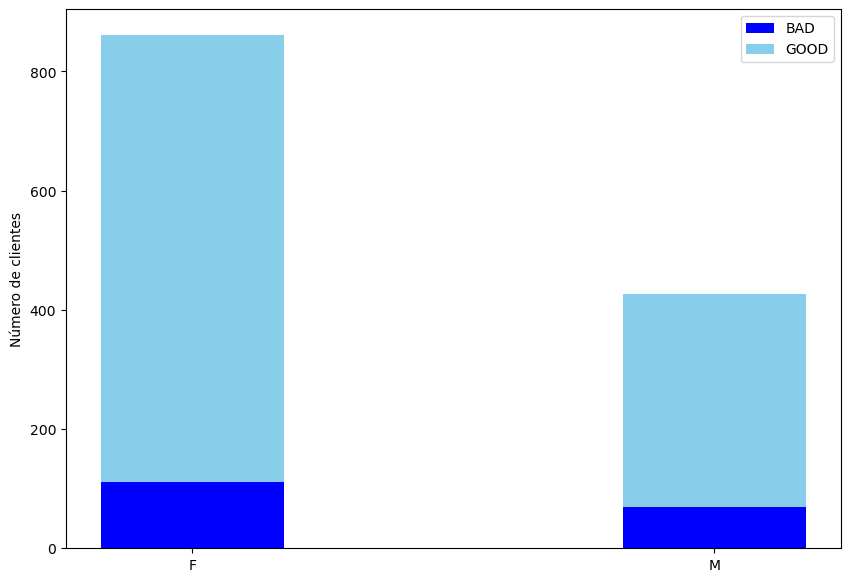

In [512]:
bar_plot_stack(pivot_table_level1(df_rating,'CODE_GENDER'), 'CODE_GENDER', 'BAD', 'GOOD', width = 0.35, set_label = 'Número de clientes')

In [513]:
df_rating.to_csv('data/rating_f.csv')
#exportamos data para el dash

#### Monto de ingresos

Text(0.5, 1.0, 'Monto total de ingresos')

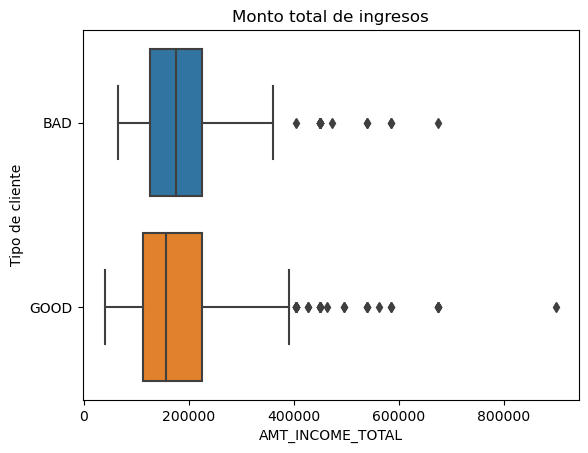

In [514]:
fig,ax = plt.subplots()
sns.boxplot(data=df_rating,  x='AMT_INCOME_TOTAL', y='CLIENT_TYPE')
ax.set_ylabel('Tipo de cliente')
ax.set_title('Monto total de ingresos')




Text(0.5, 1.0, 'Monto total de ingresos')

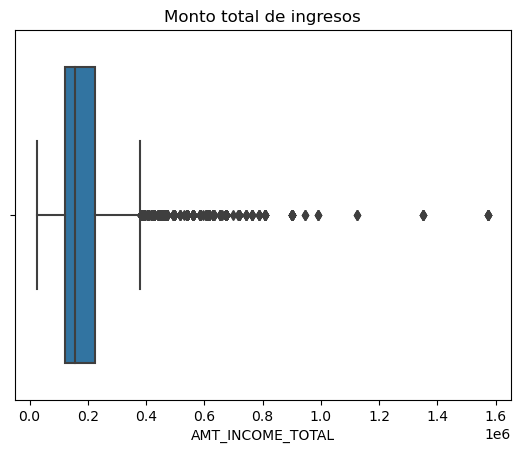

In [546]:
fig,ax = plt.subplots()
sns.boxplot(data=df_rating_all,  x='AMT_INCOME_TOTAL')

ax.set_title('Monto total de ingresos')


In [547]:
df_rating_all.AMT_INCOME_TOTAL.describe()

count    3.311000e+04
mean     1.858772e+05
std      1.014124e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [548]:
df_rating.AMT_INCOME_TOTAL.describe()

count      1288.000000
mean     181415.487578
std       96097.394571
min       40500.000000
25%      112500.000000
50%      157500.000000
75%      225000.000000
max      900000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### Tipo de ingresos

In [515]:
pivot_table_level1(df_rating,'NAME_INCOME_TYPE')

,NAME_INCOME_TYPE,BAD,GOOD
0,Commercial associate,49,233
1,Pensioner,38,259
2,State servant,11,100
3,Working,82,516


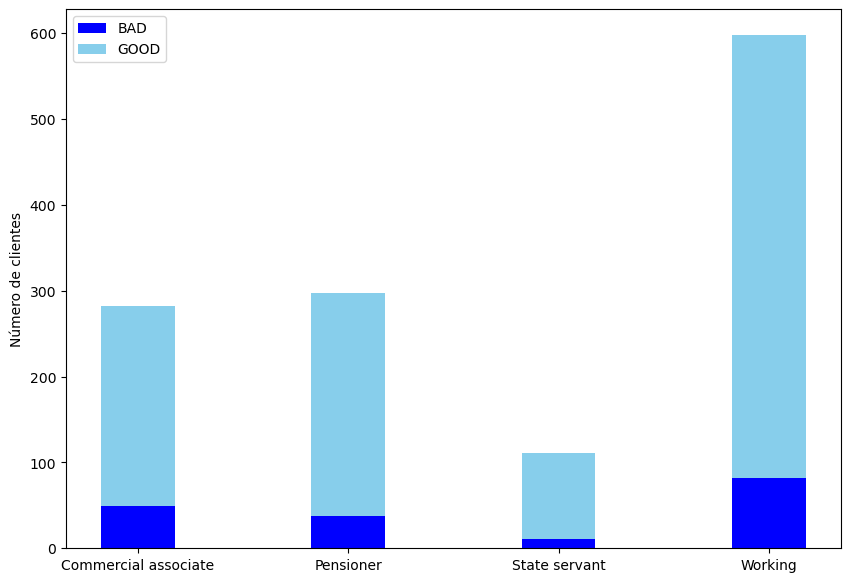

In [516]:
bar_plot_stack(pivot_table_level1(df_rating,'NAME_INCOME_TYPE'), 'NAME_INCOME_TYPE', 'BAD', 'GOOD', width = 0.35, set_label = 'Número de clientes')

#### Educación

In [517]:
pivot_table_level1(df_rating,'NAME_EDUCATION_TYPE')

,NAME_EDUCATION_TYPE,BAD,GOOD
0,Academic degree,NaN,1.0
1,Higher education,57.0,292.0
2,Incomplete higher,7.0,34.0
3,Lower secondary,6.0,8.0
4,Secondary / secondary special,110.0,773.0


#### FAMILY_STATUS

In [518]:
pivot_table_level1(df_rating,'NAME_FAMILY_STATUS')

,NAME_FAMILY_STATUS,BAD,GOOD
0,Civil marriage,6,91
1,Married,125,738
2,Separated,13,76
3,Single / not married,29,165
4,Widow,7,38


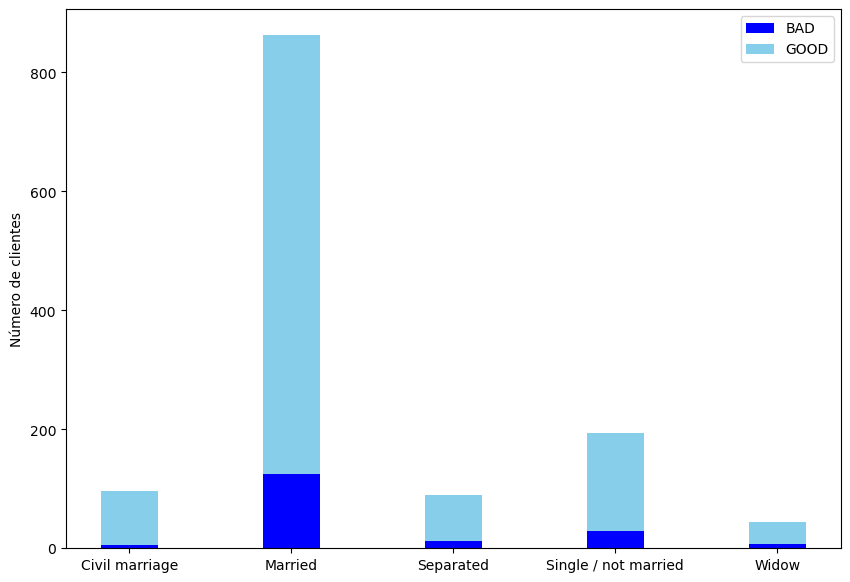

In [519]:
bar_plot_stack(pivot_table_level1(df_rating,'NAME_FAMILY_STATUS'), 'NAME_FAMILY_STATUS', 'BAD', 'GOOD', width = 0.35, set_label = 'Número de clientes')

#### NAME_HOUSING_TYPE

In [520]:
pivot_table_level1(df_rating,'NAME_HOUSING_TYPE')

,NAME_HOUSING_TYPE,BAD,GOOD
0,Co-op apartment,2,2
1,House / apartment,155,998
2,Municipal apartment,12,32
3,Office apartment,2,14
4,Rented apartment,4,26
5,With parents,5,36


#### OCCUPATION_TYPE

In [521]:
pivot_table_level1(df_rating,'OCCUPATION_TYPE')

,OCCUPATION_TYPE,BAD,GOOD
0,Accountants,3.0,40.0
1,Cleaning staff,2.0,16.0
2,Cooking staff,5.0,12.0
3,Core staff,26.0,123.0
4,Drivers,7.0,55.0
5,HR staff,NaN,2.0
6,High skill tech staff,10.0,38.0
7,IT staff,2.0,5.0
8,Laborers,28.0,202.0
9,Low-skill Laborers,2.0,14.0


In [555]:
data_occup = pivot_table_level1(df_rating_all,'OCCUPATION_TYPE').rename(columns={'UNDEFINED':'OTHER',})
data_occup.fillna(value=0, inplace = True)
data_occup['TOTAL'] = data_occup.BAD + data_occup.GOOD + data_occup.OTHER
data_occup['BAD-TOTAL_%'] = np.round(100*data_occup['BAD']/np.sum(data_occup['BAD']),2)
data_occup['GOOD-TOTAL_%'] = np.round(100*data_occup['GOOD']/np.sum(data_occup['GOOD']),2)
data_occup['TOTAL_%'] = np.round(100*data_occup['TOTAL']/np.sum(data_occup['TOTAL']),2)
data_occup

,OCCUPATION_TYPE,BAD,GOOD,OTHER,TOTAL,BAD-TOTAL_%,GOOD-TOTAL_%,TOTAL_%
0,Accountants,3.0,40.0,1063.0,1106.0,2.42,5.75,4.86
1,Cleaning staff,2.0,16.0,493.0,511.0,1.61,2.30,2.25
2,Cooking staff,5.0,12.0,570.0,587.0,4.03,1.72,2.58
3,Core staff,26.0,123.0,3101.0,3250.0,20.97,17.67,14.29
4,Drivers,7.0,55.0,1872.0,1934.0,5.65,7.90,8.51
5,HR staff,0.0,2.0,74.0,76.0,0.00,0.29,0.33
6,High skill tech staff,10.0,38.0,1221.0,1269.0,8.06,5.46,5.58
7,IT staff,2.0,5.0,50.0,57.0,1.61,0.72,0.25
8,Laborers,28.0,202.0,5371.0,5601.0,22.58,29.02,24.63
9,Low-skill Laborers,2.0,14.0,143.0,159.0,1.61,2.01,0.70


In [550]:
data_occup.iloc[:,1:].sum()

BAD        124.0
GOOD       696.0
OTHER    21917.0
dtype: float64

#### FLAG_OWN_CAR, FLAG_OWN_REALTY

In [522]:
data_group_6 = df_rating.pivot_table(index = 'CLIENT_TYPE',  columns = 'FLAG_OWN_CAR',  values = 'ID', aggfunc = 'count')
data_group_6 = pd.DataFrame(data_group_6)
data_group_6.columns = data_group_6.columns.to_flat_index()
data_group_6 = data_group_6.reset_index()
data_group_6 = data_group_6.rename_axis(None, axis=1)
data_group_6 = data_group_6.rename(columns={'N':'FLAG_OWN_CAR_NO','Y':'FLAG_OWN_CAR_YES'}) 
data_group_6

,CLIENT_TYPE,FLAG_OWN_CAR_NO,FLAG_OWN_CAR_YES
0,BAD,120,60
1,GOOD,739,369


In [523]:
data_group_7 = df_rating.pivot_table(index = 'CLIENT_TYPE',  columns = 'FLAG_OWN_REALTY',  values = 'ID', aggfunc = 'count')
data_group_7= pd.DataFrame(data_group_7)
data_group_7.columns = data_group_7.columns.to_flat_index()
data_group_7 = data_group_7.reset_index()
data_group_7 = data_group_7.rename_axis(None, axis=1)
data_group_7 = data_group_7.rename(columns={'N':'FLAG_OWN_REALTY_NO','Y':'FLAG_OWN_REALTY_YES'}) 
data_group_7

,CLIENT_TYPE,FLAG_OWN_REALTY_NO,FLAG_OWN_REALTY_YES
0,BAD,66,114
1,GOOD,346,762


In [524]:
flag_car_realty = data_group_6.merge(data_group_7, left_on = 'CLIENT_TYPE', right_on = 'CLIENT_TYPE', how = 'left')
flag_car_realty

,CLIENT_TYPE,FLAG_OWN_CAR_NO,FLAG_OWN_CAR_YES,FLAG_OWN_REALTY_NO,FLAG_OWN_REALTY_YES
0,BAD,120,60,66,114
1,GOOD,739,369,346,762


#### FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL

In [525]:
pivot_table_level1(df_rating,'FLAG_MOBIL')

,FLAG_MOBIL,BAD,GOOD
0,1.0,180,1108


In [526]:
pivot_table_level1(df_rating,'FLAG_WORK_PHONE')

,FLAG_WORK_PHONE,BAD,GOOD
0,0.0,142,892
1,1.0,38,216


In [527]:
pivot_table_level1(df_rating,'FLAG_PHONE')

,FLAG_PHONE,BAD,GOOD
0,0.0,122,830
1,1.0,58,278


In [528]:
pivot_table_level1(df_rating,'FLAG_EMAIL')

,FLAG_EMAIL,BAD,GOOD
0,0.0,162,1016
1,1.0,18,92


#### days_birth, days_employed

In [529]:
df_rating['DAYS_BIRTH'].describe()

count     1288.000000
mean    -16794.425466
std       4244.609834
min     -24914.000000
25%     -20387.000000
50%     -16896.000000
75%     -13299.000000
max      -8347.000000
Name: DAYS_BIRTH, dtype: float64

In [530]:
## generamos la columna age, primero pasando a positivos los días y dividiendo entre 365 para tener los años usamos el operador // 

In [531]:
df_rating['AGE'] = -1*(df_rating['DAYS_BIRTH'])//365
df_rating['AGE'].describe()

count    1288.000000
mean       45.512422
std        11.624927
min        22.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        68.000000
Name: AGE, dtype: float64

In [537]:
df_rating_all['AGE'] = -1*(df_rating_all['DAYS_BIRTH'])//365
df_rating_all['AGE'].describe()

count    33110.000000
mean        43.347901
std         11.545784
min         21.000000
25%         34.000000
50%         42.000000
75%         53.000000
max         68.000000
Name: AGE, dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='CLIENT_TYPE'>

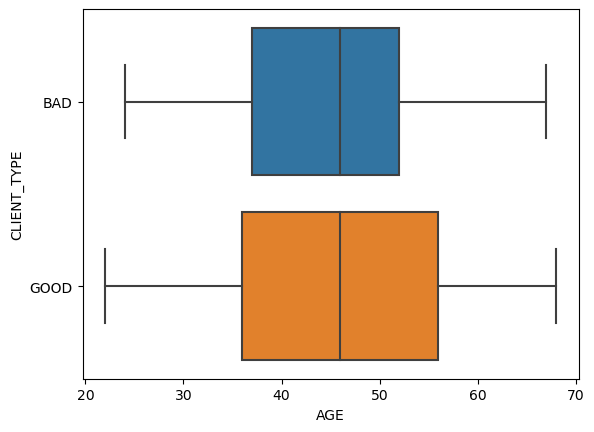

In [532]:
fig,ax = plt.subplots()
sns.boxplot(data=df_rating,  x='AGE', y='CLIENT_TYPE')


<AxesSubplot:xlabel='AGE'>

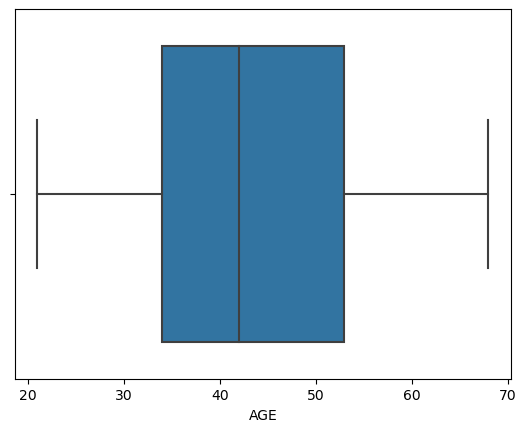

In [541]:
fig,ax = plt.subplots()
sns.boxplot(data=df_rating_all,  x='AGE')

In [533]:
##DAYS_EMPLOYED
df_rating['EMPLOYED'] = np.where(df_rating['DAYS_EMPLOYED']>0,'N','Y')

In [538]:
df_rating_all['EMPLOYED'] = np.where(df_rating_all['DAYS_EMPLOYED']>0,'N','Y')

In [534]:
pivot_table_level1(df_rating,'EMPLOYED')

,EMPLOYED,BAD,GOOD
0,N,31,259
1,Y,149,849


In [535]:
df_rating['AGE'].describe()

count    1288.000000
mean       45.512422
std        11.624927
min        22.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        68.000000
Name: AGE, dtype: float64

In [540]:
df_rating.to_csv('data/rating_f.csv')

In [539]:
df_rating_all.to_csv('data/rating_all.csv')